In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv('Prime_heritage.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.size


9366

In [ ]:
insurance.shape


(1338, 7)

In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance.describe(include = 'O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
cols_cat = insurance.select_dtypes(include = 'O').columns.tolist()
cols_cat

['sex', 'smoker', 'region']

In [ ]:
cols_number = insurance.select_dtypes(include = 'number').columns.tolist()
cols_number= insurance[cols_number]
cols_number.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
corr_cols_number = cols_number.corr()

<Axes: >

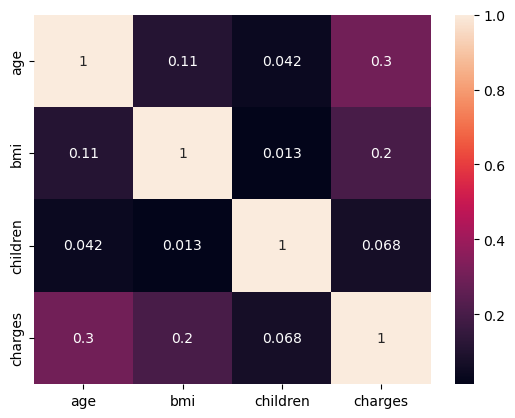

In [ ]:
sns.heatmap(data = corr_cols_number, annot = True)

In [ ]:
cols_cat = insurance.select_dtypes(include = 'O').columns.tolist()
cols_cat = insurance[cols_cat]
cols_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
for cols in cols_cat:
    print(cols_cat[cols].nunique())
    print(cols_cat[cols].unique())
    print(cols_cat[cols].value_counts())
    print('-'*30)

2
['female' 'male']
sex
male      676
female    662
Name: count, dtype: int64
------------------------------
2
['yes' 'no']
smoker
no     1064
yes     274
Name: count, dtype: int64
------------------------------
4
['southwest' 'southeast' 'northwest' 'northeast']
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
------------------------------


In [ ]:
insurance['ID'] = insurance.index
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,ID
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,3
4,32,male,28.880,0,no,northwest,3866.85520,4


In [ ]:
insurance['age_cut'] = pd.qcut(insurance['age'], 10)
age = insurance.groupby(insurance['age_cut'],observed = True, as_index = False)['ID'].count()



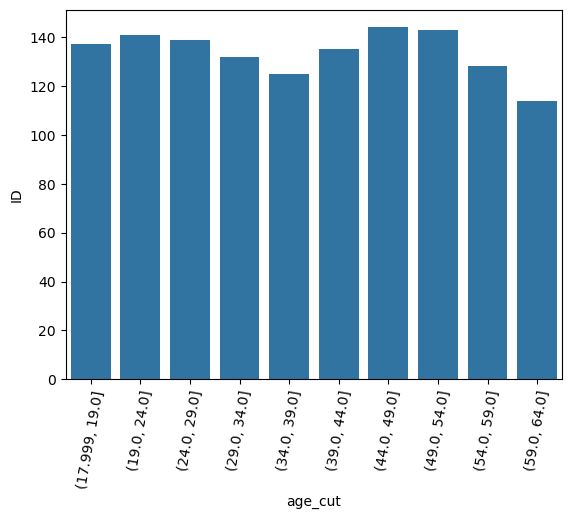

In [ ]:
sns.barplot(data = age, x= 'age_cut', y = 'ID')
plt.xticks(rotation = 80)
plt.show()


In [ ]:
np.sort(insurance['bmi'].unique())

array([15.96 , 16.815, 17.195, 17.29 , 17.385, 17.4  , 17.48 , 17.67 ,
       17.765, 17.8  , 17.86 , 17.955, 18.05 , 18.3  , 18.335, 18.5  ,
       18.6  , 18.715, 18.905, 19.   , 19.095, 19.19 , 19.3  , 19.475,
       19.57 , 19.8  , 19.855, 19.95 , 20.045, 20.1  , 20.13 , 20.235,
       20.3  , 20.35 , 20.4  , 20.425, 20.52 , 20.6  , 20.615, 20.7  ,
       20.79 , 20.8  , 20.9  , 21.01 , 21.09 , 21.12 , 21.28 , 21.3  ,
       21.375, 21.4  , 21.47 , 21.5  , 21.56 , 21.565, 21.66 , 21.7  ,
       21.755, 21.78 , 21.8  , 21.85 , 21.89 , 21.945, 22.   , 22.04 ,
       22.1  , 22.135, 22.22 , 22.23 , 22.3  , 22.42 , 22.515, 22.6  ,
       22.61 , 22.705, 22.77 , 22.8  , 22.88 , 22.895, 22.99 , 23.   ,
       23.085, 23.1  , 23.18 , 23.2  , 23.21 , 23.275, 23.3  , 23.32 ,
       23.37 , 23.4  , 23.465, 23.54 , 23.56 , 23.6  , 23.65 , 23.655,
       23.7  , 23.75 , 23.76 , 23.8  , 23.845, 23.87 , 23.9  , 23.94 ,
       23.98 , 24.035, 24.09 , 24.1  , 24.13 , 24.225, 24.3  , 24.31 ,
      

In [ ]:
def bmi(weight):
    if weight < 18.5:
       return 'underweight'
    elif 18.5 <= weight <= 24.9:
       return 'healthy weight'
    elif 25 <= weight <= 29.9:
       return 'overweight'
    elif 30 <= weight <= 39.9:
       return 'obese'
    else:
       return 'severely obese'




In [ ]:
insurance['weight_class'] = insurance['bmi'].apply(bmi)
insurance['weight_class'] = pd.DataFrame(insurance['weight_class'])
insurance['weight_class']


0           overweight
1                obese
2                obese
3       healthy weight
4           overweight
             ...      
1333             obese
1334             obese
1335             obese
1336        overweight
1337        overweight
Name: weight_class, Length: 1338, dtype: object

In [ ]:
insurance.groupby(['weight_class'],observed = True, as_index = False)['ID'].count()

,weight_class,ID
0,healthy weight,222
1,obese,614
2,overweight,377
3,severely obese,105
4,underweight,20


In [ ]:
#gender_bmi = pd.crosstab(insurance['weight_class'], insurance['sex')

gender_bmi = pd.crosstab(index = insurance['weight_class'], columns =[ insurance['sex'], insurance['region']] )
gender_bmi


sex               female                                    male            \
region         northeast northwest southeast southwest northeast northwest   
weight_class                                                                 
healthy weight        38        34        20        24        34        28   
obese                 68        71        83        71        59        69   
overweight            40        48        46        57        57        57   
severely obese         9         8        26         7         9         3   
underweight            6         3         0         3         4         4   

sex                                 
region         southeast southwest  
weight_class                        
healthy weight        20        24  
obese                104        89  
overweight            28        44  
severely obese        37         6  
underweight            0         0

In [ ]:
bmi_charges = insurance.groupby(['smoker'], as_index = False)['charges'].sum()
bmi_charges

,smoker,charges
0,no,8.974061e+06
1,yes,8.781764e+06


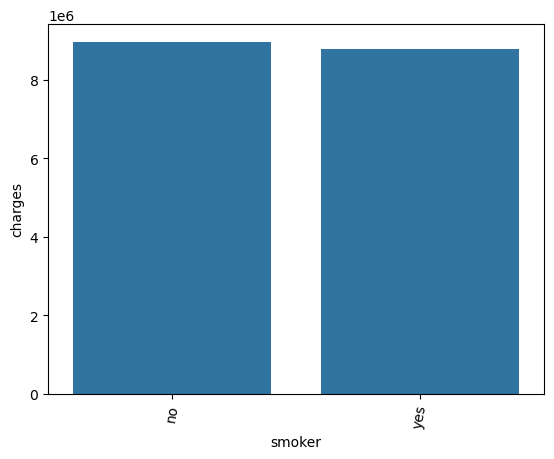

In [ ]:
sns.barplot(data=bmi_charges,   x='smoker',   y= 'charges')
plt.xticks(rotation = 80)
plt.show()

In [ ]:
insurance.groupby(['charges'], as_index = False)['charges'].count()

,charges
0,1
1,1
2,1
3,1
4,1
...,...
1332,1
1333,1
1334,1
1335,1


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
data = {'squarefoot': [1000,1200,1500, 1800,2000], 'price':[150,180, 210,250, 280]}
house = pd.DataFrame(data)
house

,squarefoot,price
0,1000,150
1,1200,180
2,1500,210
3,1800,250
4,2000,280


y = b0+b1x

x|y|x-avg(x)|y-avg(y)|(x-avg(x))(y-avg(y))|(x-avg(x)**2)

In [ ]:
X_avg = house['squarefoot'].mean()
X =  house['squarefoot']

In [ ]:
y_avg = house['price'].mean()
y = house['price']

In [ ]:
X_values = X-X_avg

In [ ]:
y_values = y-y_avg

In [ ]:
numerator = np.sum(X_values*y_values)

In [ ]:
denominator = np.sum(X_values**2)
denominator

680000.0

In [ ]:
b1 = numerator/denominator
b1.round(3)

0.126

In [ ]:
b0 = y_avg - b1*X_avg
b0.round(3)

24.294

In [ ]:
data={'square_foot':[1000,1200,1500,1800,2000],
'Bedrooms':[ 1,2,3,4,5],
'location score':[ 8,5,7,4,6],
'price':[ 150,180,210,250,280]}

house_price=pd.DataFrame(data)
house_price

,square_foot,Bedrooms,location score,price
0,1000,1,8,150
1,1200,2,5,180
2,1500,3,7,210
3,1800,4,4,250
4,2000,5,6,280


y = b0+b1x1+b2x2+b3x3

	square_foot(x1)|Bedrooms(x2)|location score(x3)

In [ ]:
house_price['location score']

0    8
1    5
2    7
3    4
4    6
Name: location score, dtype: int64

In [ ]:
X =[
  [1000,1,8],
  [1200,2,5],
  [1500,3,7],
  [1800,4,4],
  [2000,5,6]
]

In [ ]:
X_values = np.array(X)
y = [ 150,180,210,250,280]
y_values = np.array(y)
y_values

array([150, 180, 210, 250, 280])

In [ ]:
B = np.linalg.inv(X_values.T @ X_values) @ X_values.T @ y_values
B.round(3)

array([ 0.159, -8.293, -0.059])

b0 = avg(y)- b1(avg(x1))+ b2(avg(x2))+b3(avg(x3))

In [ ]:
avg_y = house_price['price'].mean()
avg_x1 = house_price['square_foot'].mean()
avg_x2 = house_price['Bedrooms'].mean()
avg_x3 = house_price['location score'].mean()

b0 = avg_y - (0.159*avg_x1)-(-8.293*avg_x2) -(-0.059*avg_x3)
np.round(b0,3)

0.733

In [ ]:
y = b0+0.159*1200 +-8.293*2 +-0.059*5
y

174.65200000000002

In [ ]:
insurance.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'ID',
       'age_cut', 'weight_class'],
      dtype='object')

In [ ]:
X = insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = insurance['charges']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 67 )

In [ ]:
X_train.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region
154    40  female  25.460         1     no  northeast
1293   46    male  25.745         3     no  northwest
240    23  female  36.670         2    yes  northeast
706    51  female  38.060         0    yes  southeast
525    18  female  33.880         0     no  southeast
...   ...     ...     ...       ...    ...        ...
905    26  female  29.355         2     no  northeast
985    44  female  25.800         1     no  southwest
7      37  female  27.740         3     no  northwest
821    26    male  17.670         0     no  northwest
835    42    male  35.970         2     no  southeast

[936 rows x 6 columns]>

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 1054 to 195
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       402 non-null    int64  
 1   sex       402 non-null    object 
 2   bmi       402 non-null    float64
 3   children  402 non-null    int64  
 4   smoker    402 non-null    object 
 5   region    402 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 22.0+ KB


In [ ]:
X_train.select_dtypes(include = 'O').columns.tolist()

['sex', 'smoker', 'region']

In [ ]:
X_train.select_dtypes(include = 'number').columns.tolist()

['age', 'bmi', 'children']

In [ ]:
X_train['region'].value_counts()

region
southeast    260
northwest    238
southwest    226
northeast    212
Name: count, dtype: int64

In [ ]:
num_features= ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']
one_hot = OneHotEncoder(sparse_output = False, handle_unknown ='ignore')
scaler = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer(transformers = [
    ('cat', Pipeline(steps= [
      ('one_hot',one_hot)
    ]),cat_features),
    ('num', Pipeline(steps= [
      ('scaler',scaler)
    ]),num_features)
])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['sex', 'smoker', 'region']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children'])])

In [ ]:
preprocessor.fit_transform(X_train, X_test)

array([[ 1.        ,  0.        ,  1.        , ...,  0.03927359,
        -0.87149402, -0.05706938],
       [ 0.        ,  1.        ,  1.        , ...,  0.46921604,
        -0.82547547,  1.6122101 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.17889669,
         0.93856905,  0.77757036],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.17569764,
        -0.5033456 ,  1.6122101 ],
       [ 0.        ,  1.        ,  1.        , ..., -0.96392547,
        -2.12933446, -0.89170912],
       [ 0.        ,  1.        ,  1.        , ...,  0.18258774,
         0.82554102,  0.77757036]])

In [ ]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model',ElasticNet(l1_ratio = 0.3, max_iter = 3000))
])


In [ ]:
ElasticNet().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', ElasticNet(l1_ratio=0.3, max_iter=3000))])

In [ ]:
y_pred = pipeline_lr.predict(X_test)

In [ ]:
print(r2_score(y_test, y_pred))

0.4379630040887116


In [ ]:
print(mean_squared_error(y_test, y_pred))

87563228.54606892


In [ ]:
insurance['charges'].nunique()

1337

In [ ]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', ElasticNet(l1_ratio=0.3, max_iter=3000))])